<a href="https://colab.research.google.com/github/delta2127/Project-Sem2/blob/main/ML_To_Predict_Etherium_Price_Ritvik_Kanchan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Importing Requied Python Libraries*

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##*Importing and reading Datasets*

In [48]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
df=pd.read_csv('/content/gdrive/MyDrive/DS/Ethereum Historical Data.csv')
print("Training and Testing Dataset On Ethereum Historical Data : - \n",df.head(10))  

Training and Testing Dataset On Ethereum Historical Data : - 
          Date  Price   Open   High    Low     Vol. Change %
0  10-03-2016  11.75   11.2  11.85  11.07    0.00K    4.91%
1  11-03-2016  11.95  11.75  11.95  11.75    0.18K    1.70%
2  12-03-2016  12.92  11.95  13.45  11.95    0.83K    8.12%
3  13-03-2016  15.07  12.92  15.07  12.92    1.30K   16.64%
4  14-03-2016   12.5  15.07  15.07   11.4   92.18K  -17.05%
5  15-03-2016  13.06  12.63  13.42  11.98   39.73K    4.48%
6  16-03-2016  12.88  13.06  13.89  12.62   19.24K   -1.38%
7  17-03-2016  10.74  12.58  12.61  10.44   89.45K  -16.61%
8  18-03-2016  10.74  11.09   11.2   8.34  157.37K    0.00%
9  19-03-2016  10.31  10.97   11.1   9.78   67.55K   -4.00%


In [50]:
dfp=pd.read_csv('/content/gdrive/MyDrive/DS/Ethereum Historical Dataprd.csv')
print("First Prediction Dataset On Ethereum Historical Data : - \n",dfp.head(10))

First Prediction Dataset On Ethereum Historical Data : - 
          Date     Price      Open      High       Low   Vol. Change %
0  01-01-2021    729.12    735.87    748.96    715.74  1.64M   -0.93%
1  02-01-2021     774.5       729    787.26    715.15  2.25M    6.22%
2  03-01-2021    974.97    774.54  1,008.49    769.57  4.02M   25.88%
3  04-01-2021  1,042.40    977.76  1,158.27    894.24  5.19M    6.92%
4  05-01-2021  1,099.52  1,042.48  1,131.56    976.91  3.25M    5.48%
5  06-01-2021  1,207.77  1,099.77  1,210.78  1,060.67  3.75M    9.85%
6  07-01-2021  1,224.35  1,208.71  1,286.81  1,153.09  2.71M    1.37%
7  08-01-2021  1,215.73  1,224.33  1,271.08  1,069.25  2.71M   -0.70%
8  09-01-2021  1,275.58  1,215.92  1,301.75  1,172.39  1.99M    4.92%
9  10-01-2021  1,256.04  1,275.87  1,347.98  1,180.45  2.65M   -1.53%


In [51]:
dfp2=pd.read_csv('/content/gdrive/MyDrive/DS/ETHCDprd.csv')
print("Second Prediction Dataset On Ethereum Historical data  : - \n",dfp2.head(10))

Second Prediction Dataset On Ethereum Historical data  : - 
          Date    Price     Open     High      Low
0  01-01-2021   741.12   752.32   755.31   724.43
1  02-01-2021   730.04   736.71   749.06   721.92
2  03-01-2021   771.48   729.73   784.51   716.23
3  04-01-2021   976.89   771.79   989.55   765.72
4  05-01-2021 1,017.86   971.64 1,151.07   890.47
5  06-01-2021 1,123.16 1,041.50 1,126.87   980.28
6  07-01-2021 1,193.57 1,101.90 1,210.54 1,059.15
7  08-01-2021 1,251.05 1,209.69 1,287.69 1,160.90
8  09-01-2021 1,208.58 1,223.84 1,273.60 1,069.08
9  10-01-2021 1,287.48 1,215.23 1,302.22 1,171.72


##*Exploratory Data Analytics*

In [52]:
print("\n*** Columns ***")
print(df.columns)

print("\n*** Structure ***")
print(df.info())

print("\n*** Summary ***")
print(df.describe())

print("\n*** Head ***")
print(df.head())



*** Columns ***
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1758 non-null   object
 1   Price     1758 non-null   object
 2   Open      1758 non-null   object
 3   High      1758 non-null   object
 4   Low       1758 non-null   object
 5   Vol.      1758 non-null   object
 6   Change %  1758 non-null   object
dtypes: object(7)
memory usage: 96.3+ KB
None

*** Summary ***
              Date  Price   Open   High    Low  Vol. Change %
count         1758   1758   1758   1758   1758  1758     1758
unique        1758   1648   1638   1640   1631  1459     1070
top     05-01-2017  10.16  10.16  10.16  10.16     -    0.00%
freq             1      9      8      7      7     8       14

*** Head ***
         Date  Price   Open   High    Low    

##*Dependent Variable*

In [53]:
depVars = 'Price'
print("\n*** Dep Vars ***")
print(depVars)


*** Dep Vars ***
Price


##*Data Transformation*

Droping non significant columns

In [54]:
df= df.drop('Date',axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1758 non-null   object
 1   Open      1758 non-null   object
 2   High      1758 non-null   object
 3   Low       1758 non-null   object
 4   Vol.      1758 non-null   object
 5   Change %  1758 non-null   object
dtypes: object(6)
memory usage: 82.5+ KB
None


Applying necessary transformations

In [55]:
df["Price"]=df["Price"].str.replace(",","")
df["Open"]=df["Open"].str.replace(",","")
df["High"]=df["High"].str.replace(",","")
df["Low"]=df["Low"].str.replace(",","")

df["Vol."]=df["Vol."].str.replace("K","")
for i in df["Vol."]:
     if(('M' in i)==False and i!='-'):
         df["Vol."]=df["Vol."].str.replace(i,str(float(i)/1000))

df["Vol."]=df["Vol."].str.replace("M","")
df["Change %"]=df["Change %"].str.replace("%","")

df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')
df['Open'] = pd.to_numeric(df['Open'],errors = 'coerce')
df['High'] = pd.to_numeric(df['High'],errors = 'coerce')
df['Low'] = pd.to_numeric(df['Low'],errors = 'coerce')
df['Change %'] = pd.to_numeric(df['Change %'],errors = 'coerce')
df['Vol.'] = pd.to_numeric(df['Vol.'],errors = 'coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1758 non-null   float64
 1   Open      1758 non-null   float64
 2   High      1758 non-null   float64
 3   Low       1758 non-null   float64
 4   Vol.      1750 non-null   float64
 5   Change %  1758 non-null   float64
dtypes: float64(6)
memory usage: 82.5 KB
None


Outliers Finding

In [56]:
print('\n*** Outlier Count ***')
colNames = df.columns
dsRetValue = pd.Series() 
for colName in colNames:
    if (df[colName].dtypes == 'object'):
        continue
    colValues = df[colName].values
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(ndOutData)
    dsRetValue[colName] = ndOutData.size
print(dsRetValue)

print('\n*** Outlier Values ***')
colNames = df.columns
dsRetValue = pd.Series() 
for colName in colNames:
    if (df[colName].dtypes == 'object'):
        continue
    colValues = df[colName].values
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(colValues[ndOutData])
    dsRetValue[colName] = str(ndOutData)
print(dsRetValue)


*** Outlier Count ***
Price       15
Open        15
High        19
Low         15
Vol.         0
Change %    28
dtype: int64

*** Outlier Values ***
Price       [1115.8  1129.3  1283.7  1248.   1135.5  1257....
Open        [1115.9  1129.4  1285.7  1245.9  1135.1  1257....
High        [1116.   1225.   1299.   1381.9  1331.8  1285....
Low         [1119.1  1203.2  1102.5  1083.4  1252.6  1256....
Vol.                                                       []
Change %    [ 17.95 -24.59 -26.91  18.8   22.41  21.42  29...
dtype: object


Variance,Standard Deviation and mean of columns

In [57]:
print('\n*** Variance In Columns ***')
print(df.var())

print('\n*** StdDev In Columns ***')
print(df.std())

print('\n*** Mean In Columns ***')
print(df.mean())


*** Variance In Columns ***
Price      52,546.13
Open       52,443.84
High       57,361.67
Low        46,736.01
Vol.           68.63
Change %       32.54
dtype: float64

*** StdDev In Columns ***
Price      229.23
Open       229.01
High       239.50
Low        216.19
Vol.         8.28
Change %     5.70
dtype: float64

*** Mean In Columns ***
Price      249.12
Open       248.71
High       258.28
Low        237.82
Vol.         6.10
Change %     0.40
dtype: float64


Finding zeros in columns

In [58]:
print((df==0).sum())

Price        0
Open         0
High         0
Low          0
Vol.         1
Change %    14
dtype: int64


Finding and Handling Nulls

In [59]:
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 

#handling nulls
df['Vol.'] = df['Vol.'].fillna(df['Vol.'].mean())

print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 


*** Columns With Nulls ***
Price       0
Open        0
High        0
Low         0
Vol.        8
Change %    0
dtype: int64

*** Columns With Nulls ***
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


Correlation Table

In [60]:
pd.options.display.float_format = '{:,.2f}'.format
dfc =df.corr()
print(dfc)

          Price  Open  High   Low  Vol.  Change %
Price      1.00  1.00  1.00  1.00 -0.02      0.02
Open       1.00  1.00  1.00  1.00 -0.02     -0.04
High       1.00  1.00  1.00  1.00 -0.02     -0.01
Low        1.00  1.00  1.00  1.00 -0.02     -0.01
Vol.      -0.02 -0.02 -0.02 -0.02  1.00     -0.02
Change %   0.02 -0.04 -0.01 -0.01 -0.02      1.00


##*Visual Data Analytics*

Heat Map


*** Heat Map ***


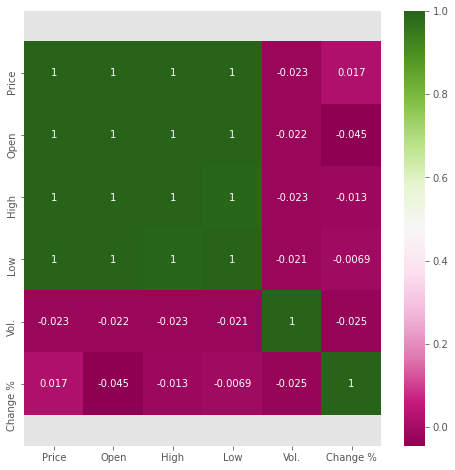

In [61]:
print("\n*** Heat Map ***")
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

Box Plot


*** Boxplot ***


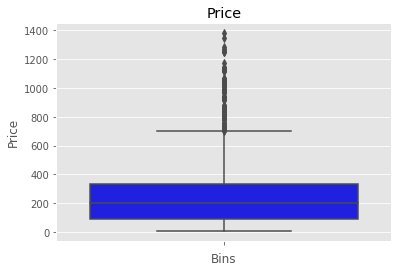

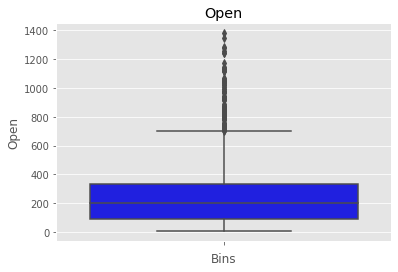

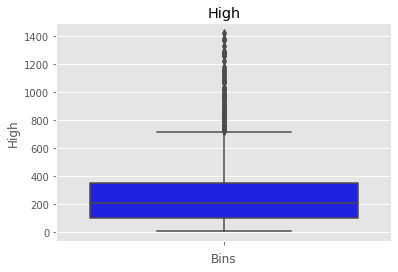

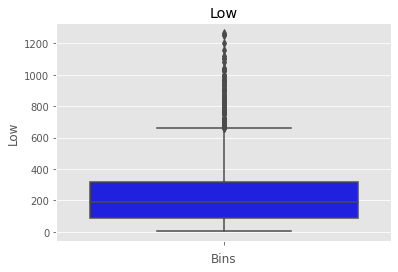

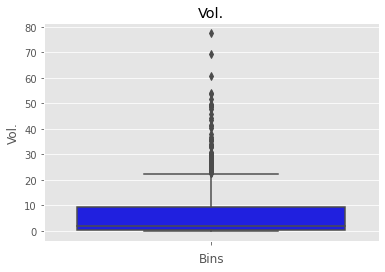

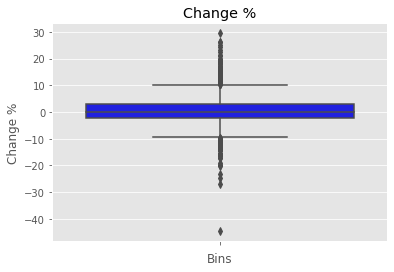

In [62]:
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

Histogram


*** Histograms ***


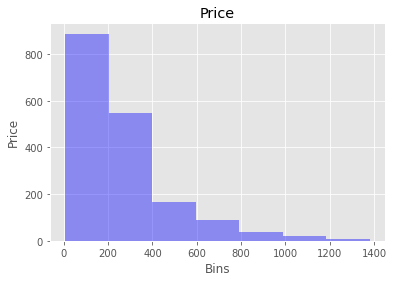

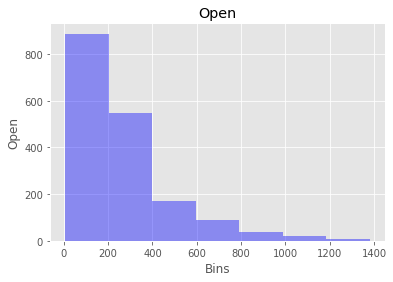

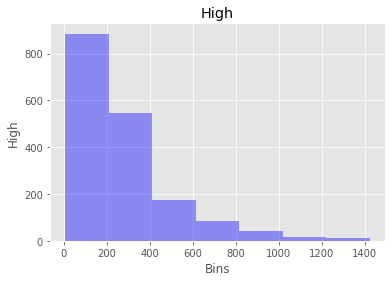

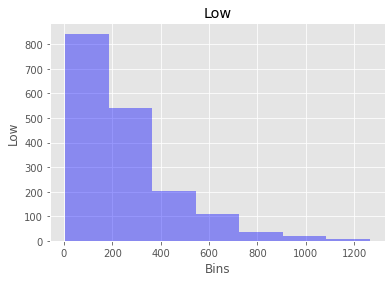

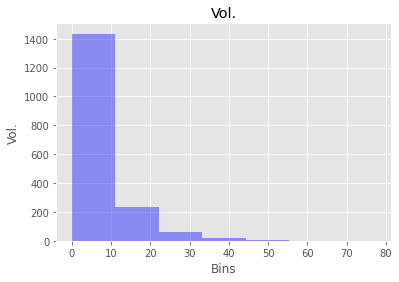

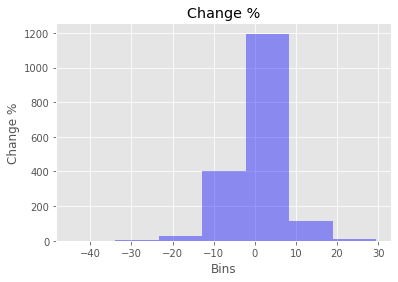

In [63]:
print('\n*** Histograms ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

Scatterplot


*** Scatterplot ***
Change %


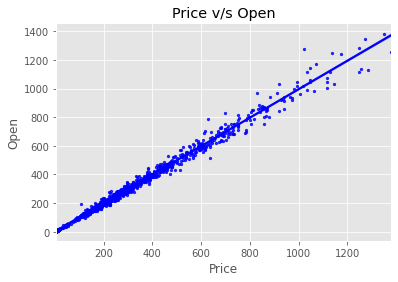

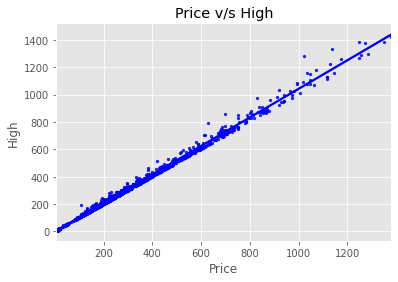

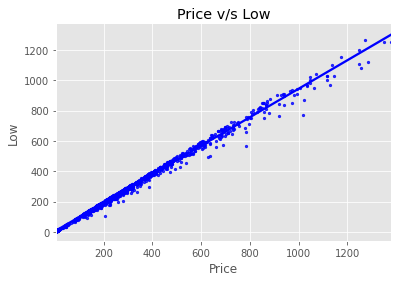

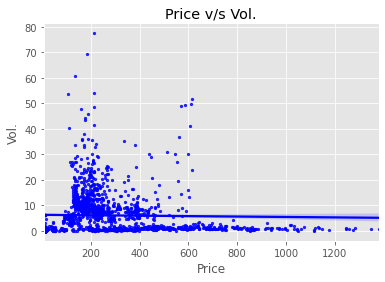

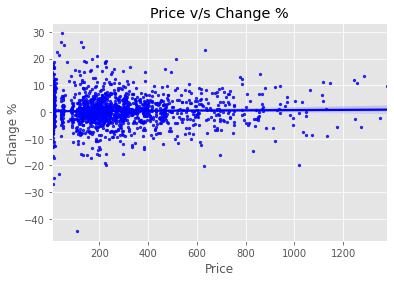

In [64]:
print('\n*** Scatterplot ***')
colNames = df.columns.tolist()
colNames.remove(depVars)
print(colName)
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.regplot(data=df, x=depVars, y=colName, color= 'b', scatter_kws={"s": 5})
    plt.title(depVars + ' v/s ' + colName)
    plt.show()

##*Split Train & Test*

In [65]:
print("\n*** Prepare Data ***")
dfTrain = df.sample(frac=0.8, random_state=271)
dfTest=df.drop(dfTrain.index)
print("Train Count:",len(dfTrain.index))
print("Test Count :",len(dfTest.index))


*** Prepare Data ***
Train Count: 1406
Test Count : 352


##*Model Creation & Fitting*

In [66]:
print("\n*** Regression Data ***")
allCols = dfTrain.columns.tolist()
print(allCols)
allCols.remove(depVars)
print(allCols)
print("Done ...")

print("\n*** Regression Summary ***")
X = sm.add_constant(dfTrain[allCols])
y = dfTrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())

print("\n*** Drop Cols ***")
allCols.remove('Vol.')
#allCols.remove('Change %')
print(allCols)

print("\n*** Regression Summary Again ***")
X = sm.add_constant(dfTrain[allCols])
y = dfTrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())

print("\n*** Regression Data For Train ***")
X_train = dfTrain[allCols].values
y_train = dfTrain[depVars].values
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))
print("Done ...")

print("\n*** Regression Data For Test ***")
X_test = dfTest[allCols].values
y_test = dfTest[depVars].values
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
print(type(y_test))
print("Done ...")


*** Regression Data ***
['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
['Open', 'High', 'Low', 'Vol.', 'Change %']
Done ...

*** Regression Summary ***
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.244e+05
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:47:44   Log-Likelihood:                -4907.4
No. Observations:                1406   AIC:                             9827.
Df Residuals:                    1400   BIC:                             9858.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

##*Selecting Linear Regression Model*

In [67]:
model = LinearRegression()
model.fit(X,y)
print(model)
print("Done ...")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Done ...


##*predict new data form First prediction dataset*

['Open', 'High', 'Low', 'Change %']

*** Regression Model ***
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      150 non-null    object
 1   Price     150 non-null    object
 2   Open      150 non-null    object
 3   High      150 non-null    object
 4   Low       150 non-null    object
 5   Vol.      150 non-null    object
 6   Change %  150 non-null    object
dtypes: object(7)
memory usage: 8.3+ KB
None

*** Drop Cols ***
Done ... 

*** Transformation ***
Done ... 

*** Outlier Count ***
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    1
dtype: int64

*** Outlier Values ***
Price                                         []
Open                                          []
High                                       

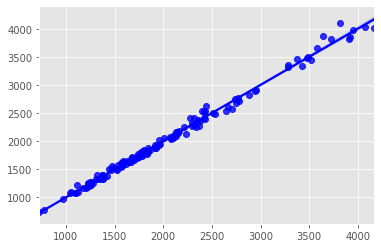


*** Mean Absolute Error ***
41.4650703140222

*** Mean Squared Error ***
3444.1944077258854

*** Root Mean Squared Error ***
58.68725933050448

*** Mean ***
2013.0319333333337
2009.8974910951615

*** Scatter Index ***
0.029153665353597043

*** Plot Series ***


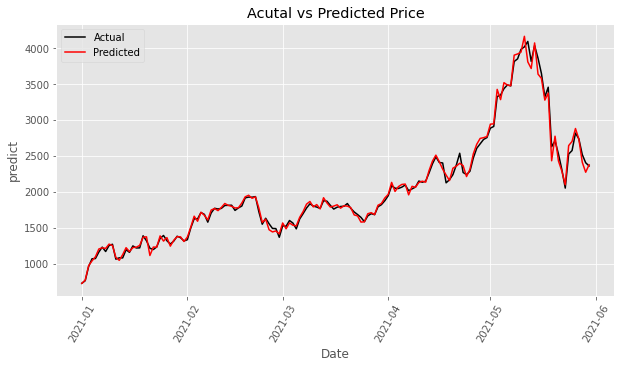

In [68]:
print(allCols)

print("\n*** Regression Model ***")
X = df[allCols].values
y = df[depVars].values
model.fit(X,y)
print(model)

print("\n*** Structure ***")
print(dfp.info())

print("\n*** Drop Cols ***")
dfD=dfp['Date']
dfp= dfp.drop('Date',axis=1)
print("Done ... ")

print("\n*** Transformation ***")
dfp["Price"]=dfp["Price"].str.replace(",","")
dfp["Open"]=dfp["Open"].str.replace(",","")
dfp["High"]=dfp["High"].str.replace(",","")
dfp["Low"]=dfp["Low"].str.replace(",","")
dfp["Vol."]=dfp["Vol."].str.replace("M","")
dfp["Vol."]=dfp["Vol."].str.replace("K","")
dfp["Change %"]=dfp["Change %"].str.replace("%","")


dfp['Price'] = pd.to_numeric(dfp['Price'],errors = 'coerce')
dfp['Open'] = pd.to_numeric(dfp['Open'],errors = 'coerce')
dfp['High'] = pd.to_numeric(dfp['High'],errors = 'coerce')
dfp['Low'] = pd.to_numeric(dfp['Low'],errors = 'coerce')
dfp['Change %'] = pd.to_numeric(dfp['Change %'],errors = 'coerce')
dfp['Vol.'] = pd.to_numeric(dfp['Vol.'],errors = 'coerce')
df['Vol.'] = df['Vol.'].fillna(df['Vol.'].mean())
print("Done ... ")

print('\n*** Outlier Count ***')
colNames = dfp.columns
dsRetValue = pd.Series() 
for colName in colNames:
    if (dfp[colName].dtypes == 'object'):
        continue
    colValues = dfp[colName].values
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(ndOutData)
    dsRetValue[colName] = ndOutData.size
print(dsRetValue)

print('\n*** Outlier Values ***')
colNames = dfp.columns
dsRetValue = pd.Series() 
for colName in colNames:
    if (dfp[colName].dtypes == 'object'):
        continue
    colValues = dfp[colName].values
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(colValues[ndOutData])
    dsRetValue[colName] = str(ndOutData)
print(dsRetValue)
        
print("\n*** Split Predict Data ***")
X_pred = dfp[allCols].values
y_pred = dfp[depVars].values
print(X_pred)
print(y_pred)

print("\n*** Predict Data ***")
p_pred = model.predict(X_pred)
dfp['predict'] = p_pred
print("Done ... ")

print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(x=y_pred, y=p_pred, color= 'b')
plt.show()

print("\n*** Mean Absolute Error ***")
mae = mean_absolute_error(y_pred, p_pred)
print(mae)

print("\n*** Mean Squared Error ***")
mse = mean_squared_error(y_pred, p_pred)
print(mse)

print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)

print('\n*** Mean ***')
print(y_pred.mean())
print(p_pred.mean())

print('\n*** Scatter Index ***')
si = rmse/y_pred.mean()
print(si)

dfp['Date']=dfD
dfp['Date'] = pd.to_datetime(dfp['Date'],format="%d-%m-%Y")    
dfp.set_index('Date', inplace=True)
print("\n*** Plot Series ***")
plt.figure(figsize=(10,5))
sns.lineplot(x=dfp.index, y='predict', data=dfp, color='k',label='Actual')
sns.lineplot(x=dfp.index, y='Price', data=dfp, color='r',label='Predicted')
plt.xticks(rotation=60)
plt.legend()
plt.title("Acutal vs Predicted Price")
plt.show()

##*predict new data form Second prediction dataset*

['Open', 'High', 'Low', 'Change %']
['Open', 'High', 'Low']

*** Regression Model ***
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    194 non-null    object 
 1   Price   194 non-null    float64
 2   Open    194 non-null    float64
 3   High    194 non-null    float64
 4   Low     194 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.7+ KB
None

*** Drop Cols ***
Done ... 

*** Outlier Count ***
Price    0
Open     0
High     0
Low      0
dtype: int64

*** Outlier Values ***
Price    []
Open     []
High     []
Low      []
dtype: object

*** Split Predict Data ***
[[ 752.3224745  755.3124654  724.4313993]
 [ 736.7099217  749.0597988  721.9209814]
 [ 729.7325671  784.5060312  716.2258855]
 [ 771.7942284  989.5517955  765.7238636]
 [ 9

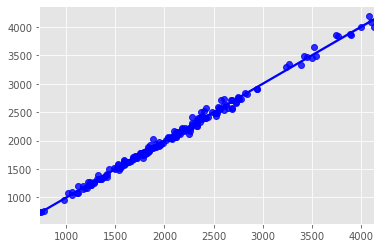


*** Mean Absolute Error ***
36.88912113622433

*** Mean Squared Error ***
2404.192814427566

*** Root Mean Squared Error ***
49.03256891523802

*** Mean ***
2070.779035135052
2068.178168023397

*** Scatter Index ***
0.02367832013136072

*** Plot Series ***


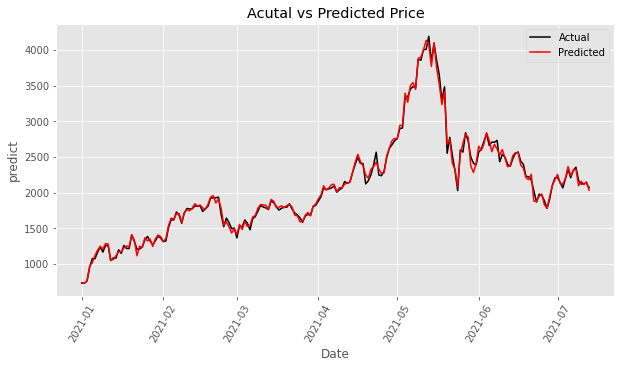

In [69]:
print(allCols)
allCols.remove('Change %')
print(allCols)

print("\n*** Regression Model ***")
X = df[allCols].values
y = df[depVars].values
model.fit(X,y)
print(model)

print("\n*** Structure ***")
print(dfp2.info())

print("\n*** Drop Cols ***")
dfD=dfp2['Date']
dfp2= dfp2.drop('Date',axis=1)
print("Done ... ")

print('\n*** Outlier Count ***')
colNames = dfp2.columns
dsRetValue = pd.Series() 
for colName in colNames:
    if (dfp2[colName].dtypes == 'object'):
        continue
    colValues = dfp2[colName].values
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(ndOutData)
    dsRetValue[colName] = ndOutData.size
print(dsRetValue)

print('\n*** Outlier Values ***')
colNames = dfp2.columns
dsRetValue = pd.Series() 
for colName in colNames:
    if (dfp2[colName].dtypes == 'object'):
        continue
    colValues = dfp2[colName].values
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(colValues[ndOutData])
    dsRetValue[colName] = str(ndOutData)
print(dsRetValue)

print("\n*** Split Predict Data ***")
X_pred = dfp2[allCols].values
y_pred = dfp2[depVars].values
print(X_pred)
print(y_pred)

print("\n*** Predict Data ***")
p_pred = model.predict(X_pred)
dfp2['predict'] = p_pred
print("Done ... ")

print("\n*** Scatter Plot ***")
plt.figure()
sns.regplot(x=y_pred, y=p_pred, color= 'b')
plt.show()

print("\n*** Mean Absolute Error ***")
mae = mean_absolute_error(y_pred, p_pred)
print(mae)

print("\n*** Mean Squared Error ***")
mse = mean_squared_error(y_pred, p_pred)
print(mse)

print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)

print('\n*** Mean ***')
print(y_pred.mean())
print(p_pred.mean())

print('\n*** Scatter Index ***')
si = rmse/y_pred.mean()
print(si)

dfp2['Date']=dfD
dfp2['Date'] = pd.to_datetime(dfp2['Date'],format="%d-%m-%Y")
dfp2.set_index('Date', inplace=True)
print("\n*** Plot Series ***")
plt.figure(figsize=(10,5))
sns.lineplot(x=dfp2.index, y='predict', data=dfp2, color='k',label='Actual')
sns.lineplot(x=dfp2.index, y='Price', data=dfp2, color='r',label='Predicted')
plt.xticks(rotation=60)
plt.legend()
plt.title("Acutal vs Predicted Price")
plt.show()